## CPE311 Computational Thinking with Python

Name: Kurt Gabriel A. Anduque

Performed on: 04/13/2025

Submitted on: 04/13/2025

Submitted to: Engr. Roman M. Richard

# Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section

# Resources:

Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv 

# Procedures:
    9.1 Introduction to Matplotlib
    
    9.2 Plotting with Pandas
    
    9.3 Pandas Plotting Subpackage

# 9.1 Introduction to Matplotlib

## Getting Started with Matplotlib



We need matplotlib.pylot for plotting.

In [492]:
import matplotlib.pyplot as plt
import pandas as pd
# here we import the necessary libraries

## About the  Data

In this notebook, we will be working with 2 datasets:




*   Facebook's stock price throughout 2018 (obtained using the stock_analysis package)


*   Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)



## Plotting Lines

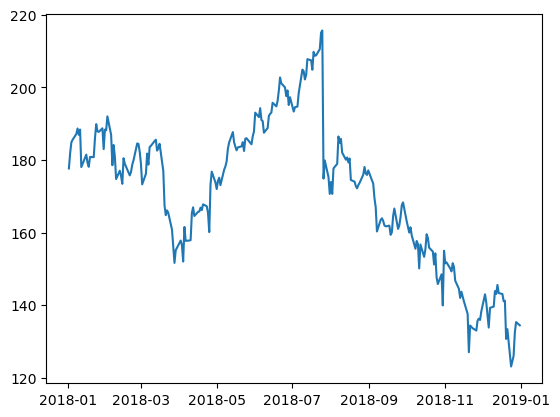

In [9]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
plt.plot(fb.index, fb.open)
plt.show()

# based on the output the code is able to create linegraph about the FB company open prices per date

Since we are working in a Jupyter notebook, we can use the magic command %matplotlib inline once and not have to call plt.show() for each plot.

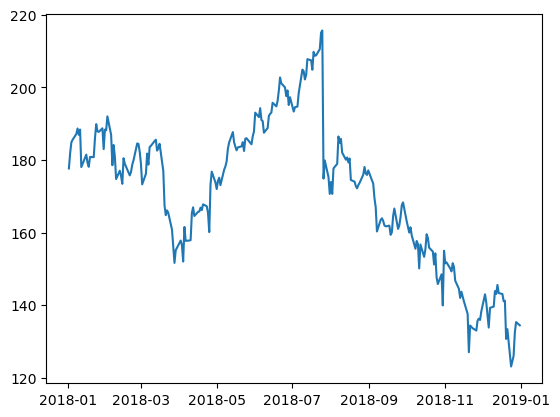

In [11]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

# with the matplot lib inline even if we do not include the plt.show() in our code the it can generate the graph

## Scatter plots


We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--' or a red
scatter plot with 'ro' :

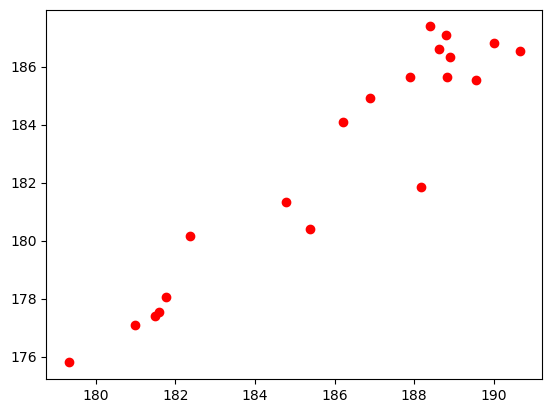

In [13]:
plt.plot('high', 'low', 'ro', data=fb.head(20))
plt.show()

# here we are able to generate a scatter plots

## Histograms

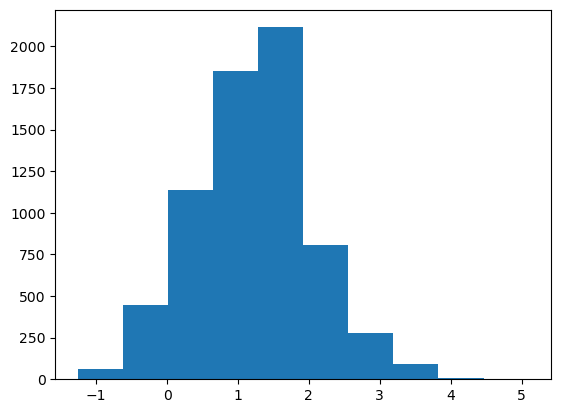

In [15]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)
plt.show()

# in this part the code shows the histogram plots

## Bin size matters


Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

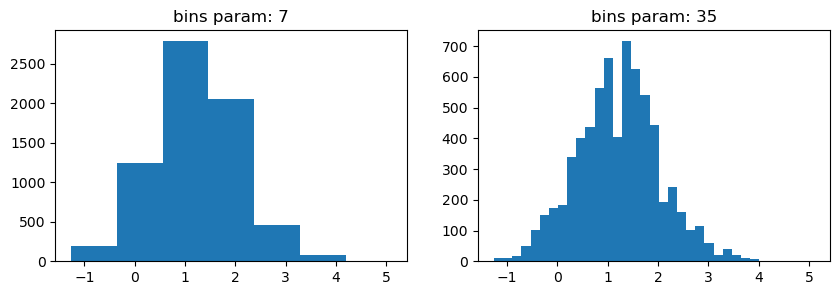

In [17]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')
plt.show()

# utilizing the sublots we cant create the many plots with different information
# here we can see that we able to generate histogram that has a7 bins and 35 bins

## Plot components


## Figure


Top-level object that holds the other plot components.


In [497]:
#
fig = plt.figure()

## Axes



Individual plots contained within the Figure .

## Creating subplots



Simply specify the number of rows and columns to create:

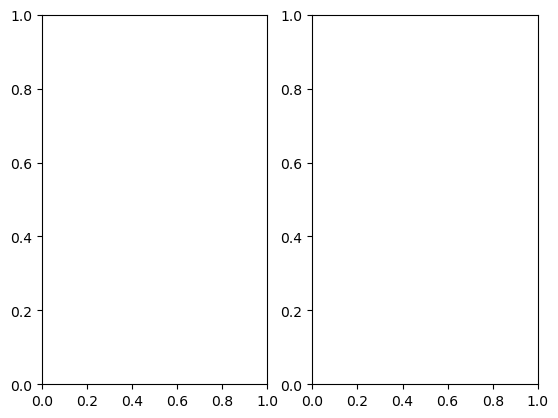

In [359]:
fig, axes = plt.subplots(1, 2)
plt.show()
# using sublplots we can generate to plots
# the syntax is suplots row,colums

As an alternative to using plt.subplots() we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture:

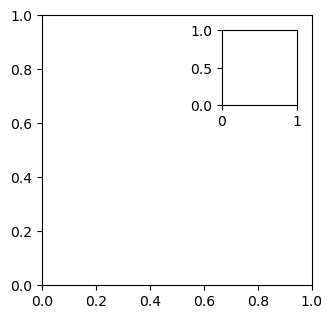

In [24]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
plt.show()
# here we can generate a plot insite a plots by manipulating the size and the figure of the axes

## Creating Plot Layouts with gridspec


We can create subplots with varying sizes as well:

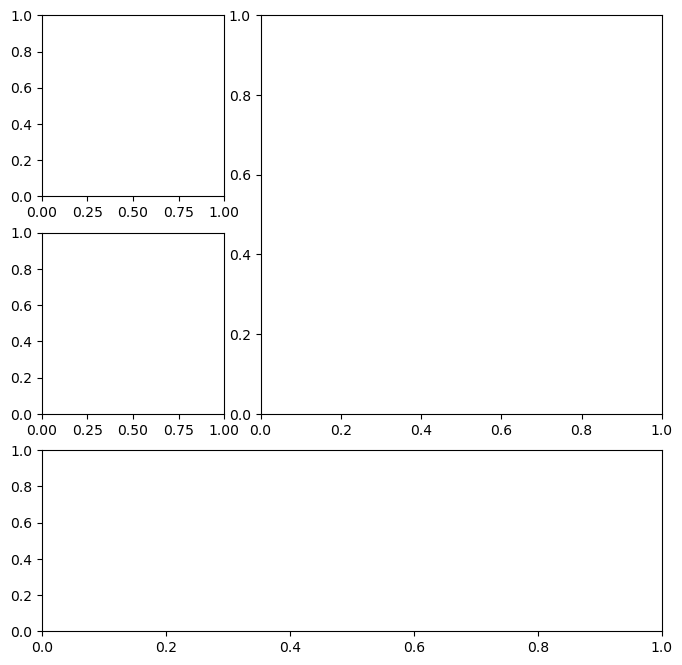

In [26]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])
plt.show()

# same thing here
# by manipulating the postion and size of the axes
# we can generate a view of plots base on our own desire

## Saving plots


Use plt.savefig() to save the last created plot. To save a specific Figure object, use its savefig() method.


In [28]:
fig.savefig('empty.png')
# here we can create a save of our plot
# however it is in png formmat

## Cleaning up



It's important to close resources when we are done with them. We use plt.close() to do so. If we pass in nothing, it will close the last plot, but we can pass the specific
Figure to close or say 'all' to close all Figure objects that are open. Let's close all the Figure objects that are open with plt.close() :

In [30]:
plt.close('all')

## Additional plotting options

# Specifying figure size


Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height):

In [32]:
fig = plt.figure(figsize=(10, 4))

This can be specified when creating subplots as well:

<Figure size 1000x400 with 0 Axes>

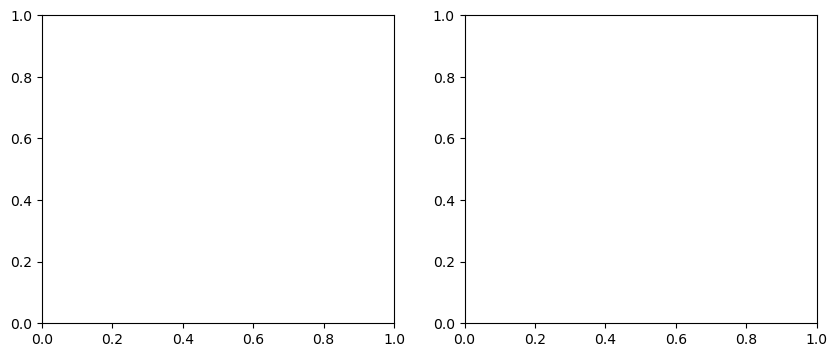

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.show()


## rcParams

A small subset of all the available plot settings (shuffling to get a good variation of options):

In [36]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.formatter.limits',
 'boxplot.boxprops.color',
 'boxplot.flierprops.markersize',
 'boxplot.meanprops.markerfacecolor',
 'contour.corner_mask',
 'date.autoformatter.hour',
 'date.autoformatter.minute',
 'figure.subplot.top',
 'font.variant',
 'image.interpolation',
 'image.resample',
 'keymap.forward',
 'keymap.grid_minor',
 'pdf.use14corefonts',
 'xtick.minor.pad',
 'yaxis.labellocation',
 'ytick.labelleft',
 'ytick.major.size',
 'ytick.minor.visible']

We can check the current default figsize using rcParams :

In [38]:
mpl.rcParams['figure.figsize']


[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):


In [40]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use rcdefaults() to restore the defaults:

In [42]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via pyplot :


In [44]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default

# 9.2 Plotting with Pandas

## Plotting with Pandas

The plot() method is available on Series and DataFrame objects. Many of the parameters get passed down to matplotlib. The kind argument let's us vary the plot
type



About the Data
In this notebook, we will be working with 2 datasets:



*   Facebook's stocks price throughout 2018 (obtained using the stock_anaylsis package)
*   Earthquake  date from September 18, 2018 - October 13, 2018 (obtained from the Geological Survery (USGS) using the USGS API)



## Setup

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')


## Evolution over time


Line plots help us see how a variable changes over time. They are the default for the kind argument, but we can pass kind='line' to be explicit in our intent:

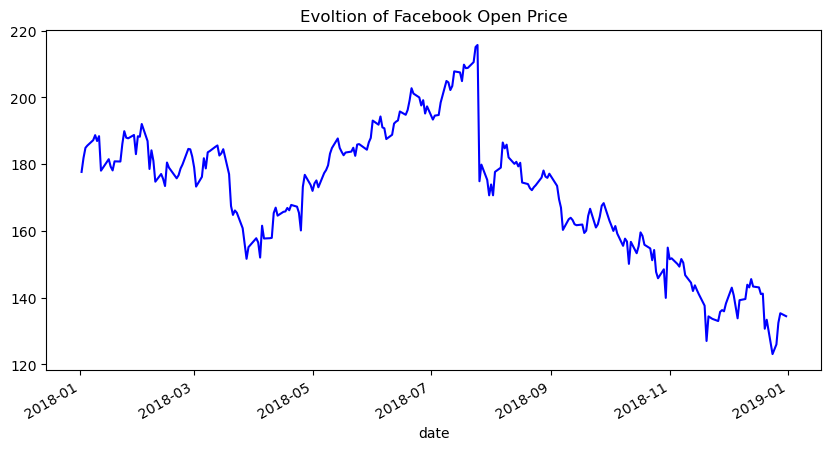

In [50]:
fb.plot(
    kind = 'line',
    y='open',
    figsize=(10, 5),
    style='b-',
    legend=False,
    title='Evoltion of Facebook Open Price'
)
plt.show()

# base on the output the code is able to generate a line graph about the evolution of open price of company fb overtime

We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:

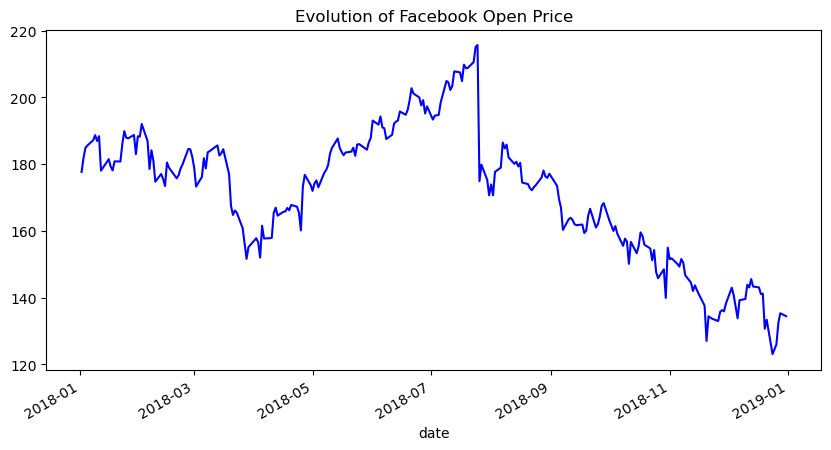

In [52]:

fb.plot(
 kind='line',
 y='open',
 figsize=(10, 5),
 color='blue',
 linestyle='solid',
 legend=False,
 title='Evolution of Facebook Open Price'
)
plt.show()
# same thing happened here we just only add a color of graph

We can also plot many lines at once by simply passing a list of the columns to plot:

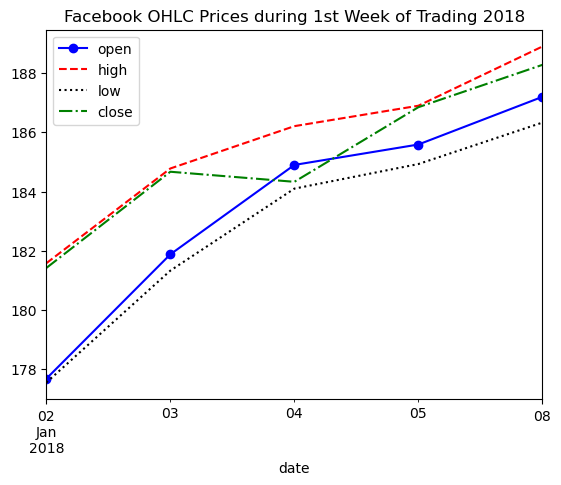

In [54]:
fb.iloc[:5,].plot(
 y=['open', 'high', 'low', 'close'],
 style=['b-o', 'r--', 'k:', 'g-.'],
 title='Facebook OHLC Prices during 1st Week of Trading 2018'
)
plt.show()

# here we are able to create a multiple line graph
# by adding the columns in the y argument

## Creating subplots


When plotting with pandas, creating subplots is simply a matter of passing subplots=True to the plot() method, and (optionally) specifying the layout in a tuple of
(rows, columns) :


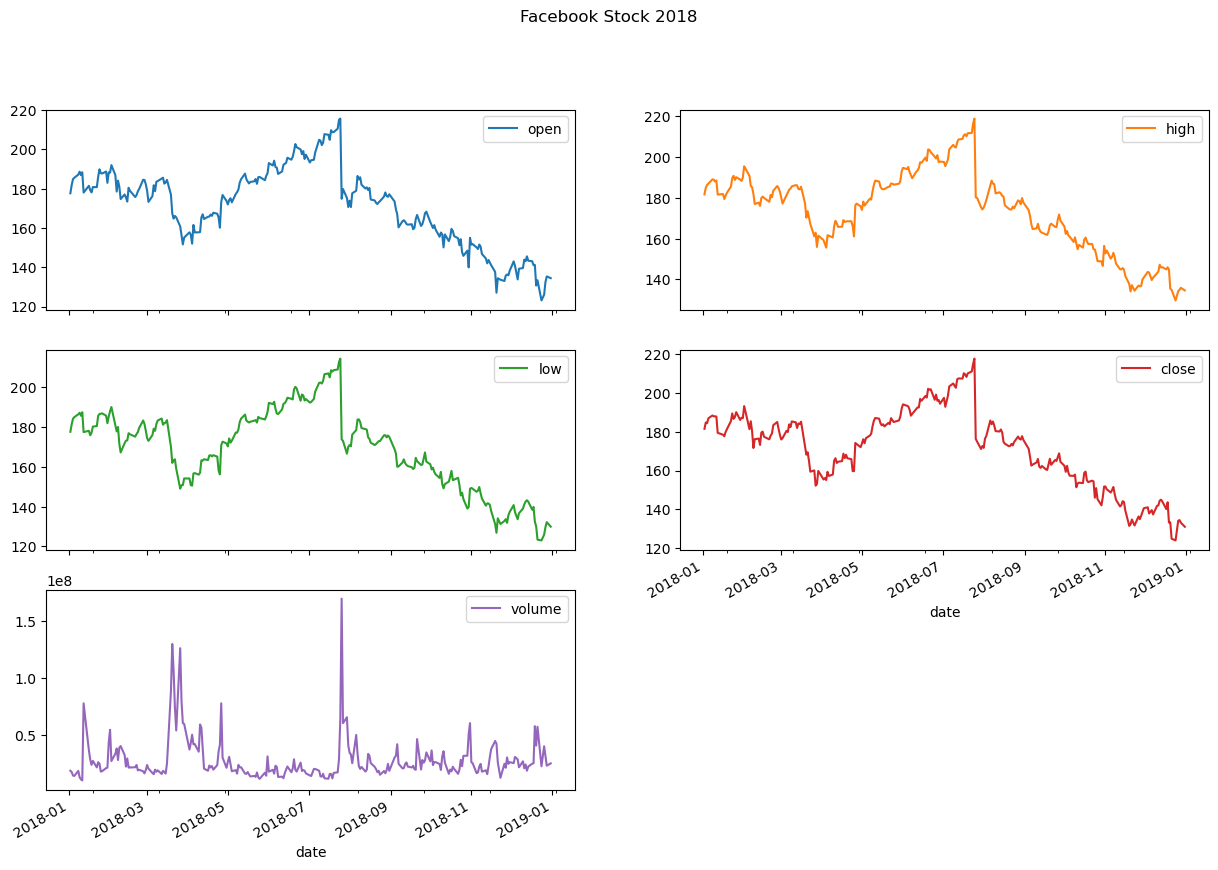

In [56]:
fb.plot(
 kind='line',
 subplots=True,
 layout=(3,2),
 figsize=(15,10),
 title='Facebook Stock 2018'
)
plt.show()

# here in the output if we tried to plot the whole dataframe and enable the subplots
# it will automatically generate a linegraph in every column only if the index is set into datetimt


Note that we didn't provide a specific column to plot and pandas plotted all of them for us

### Visualizing relationships between variables



# Scatter plots



We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the xaxis and a column for the y-axis:


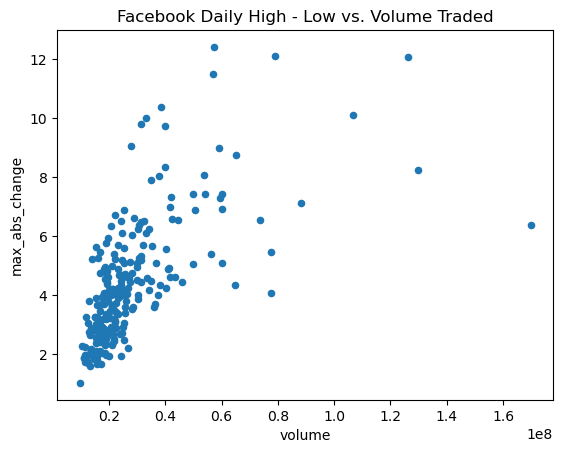

In [59]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. Volume Traded'
)
plt.show()

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in
logx=True :

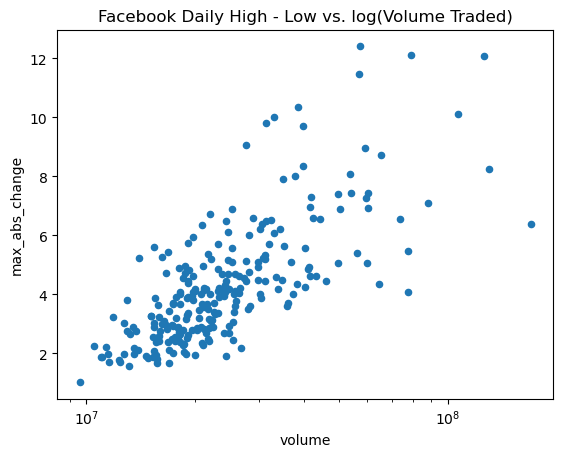

In [61]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 logx=True
)
plt.show()

With matplotlib, we could use plt.xscale('log') to do the same thing.

## Adding Transparency to Plots with alpha



Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the
alpha parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter
plot:


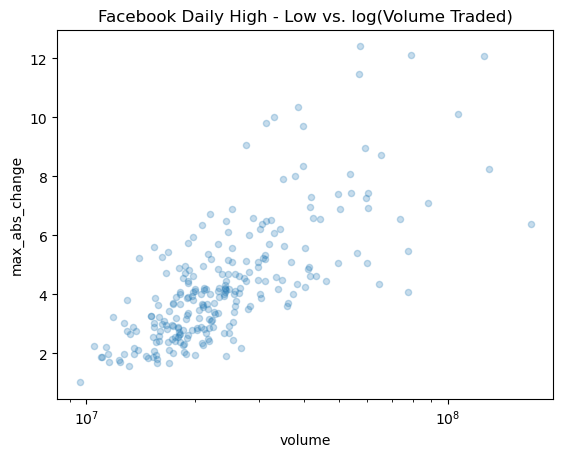

In [64]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 logx=True, alpha=0.25
)
plt.show()

## Hexbins


In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded
according to the density of points there. With pandas, this is the hexbin value for the kind argument. It can also be important to tweak the gridsize , which determines
the number of hexagons along the y-axis:

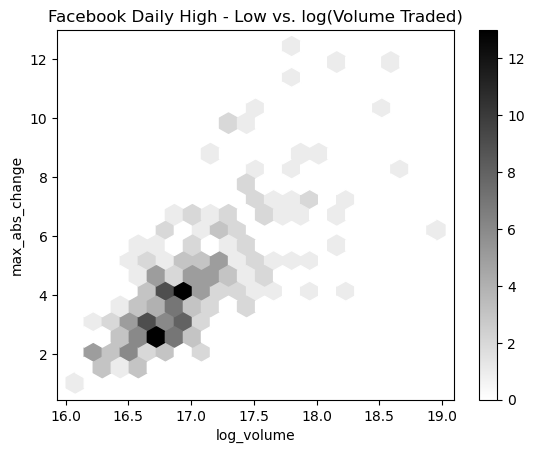

In [66]:
fb.assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).plot(
 kind='hexbin',
 x='log_volume',
 y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 colormap='gray_r',
 gridsize=20,
 sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)
plt.show()

## Visualizing Correlations with Heatmaps


Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use matshow() from matplotlib:

C:\Users\kurt\AppData\Local\Temp\ipykernel_4316\1741648857.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=45)
C:\Users\kurt\AppData\Local\Temp\ipykernel_4316\1741648857.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


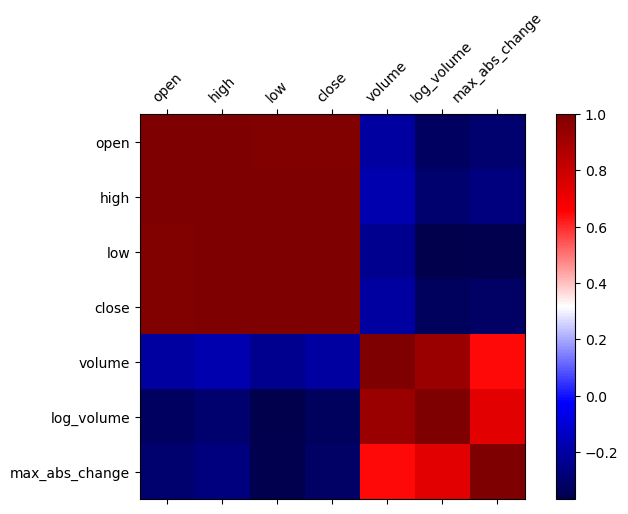

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()
im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im)
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)
plt.show()

## Visualizing distributions

## Histograms


With the pandas plot() method, making histograms is as easy as passing in kind='hist' :

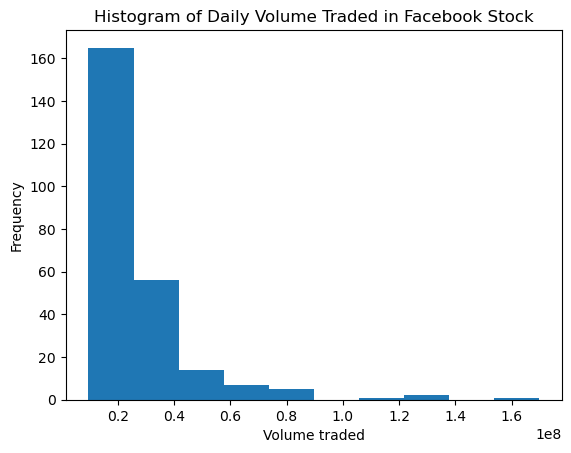

In [70]:
fb.volume.plot(
 kind='hist',
 title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)
plt.show()

We can overlap histograms to compare distributions provided we use the alpha parameter. For example, let's compare the usage and magnitude of the various magTypes
in the data:

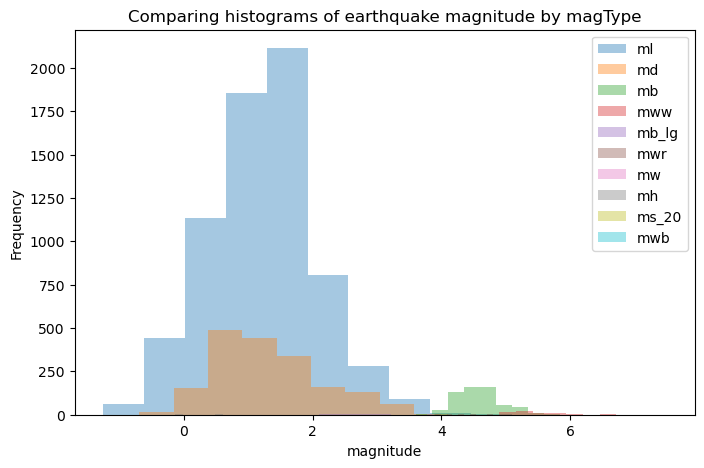

In [72]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
        kind='hist', ax=axes, alpha=0.4,
        label=magtype, legend=True,
        title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)
plt.show()


# here we can create a 2 plots in a same figure 
# we just make a difference in term of the alpha which refers to the colors transparency
# so we can compare the results of the graphs

## Kernel Density Estimation (KDE)

We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value:

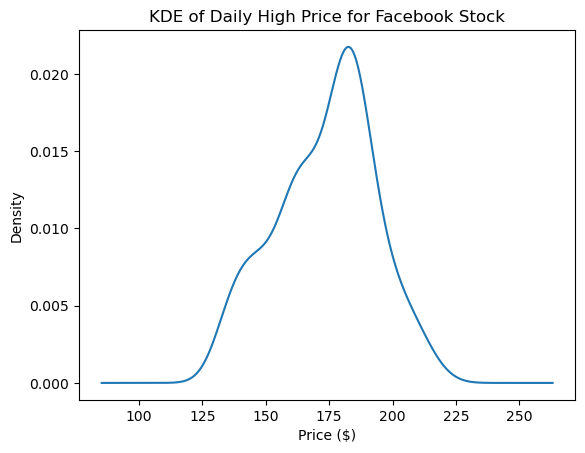

In [74]:
fb.high.plot(
 kind='kde',
 title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

# using the kde graph
# we can create a bell graph

## Adding to the result of plot()

The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the
ax argument to add to the original plot.


It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

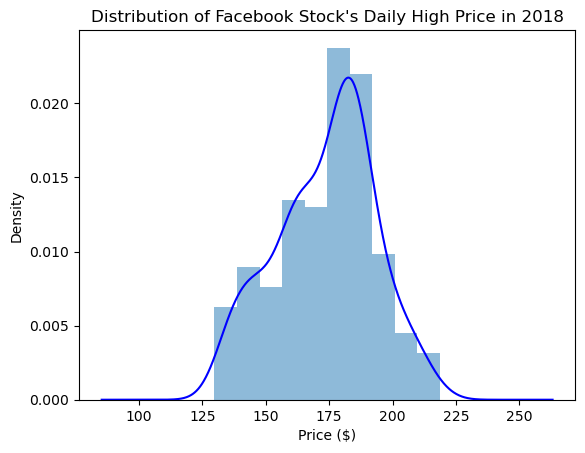

In [76]:

ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
 ax=ax, kind='kde', color='blue',
 title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()
# same thing code from the recent notes is apply to generate a 2 gprahs in a same figure
# in this case we insert a hist plot and kde plot in the same time

## Plotting the ECDF


In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative disribution
function (CDF). Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF):


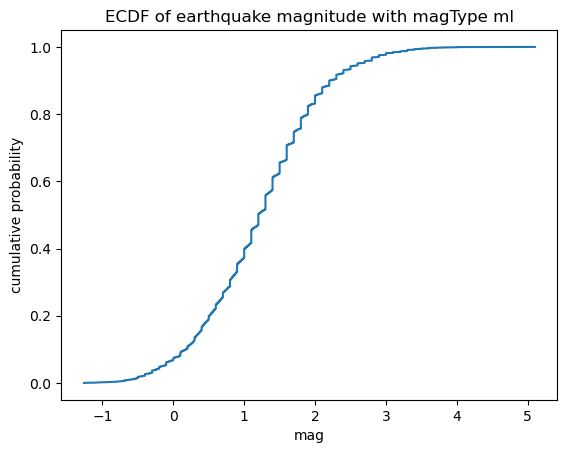

In [78]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')
plt.show()

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%:

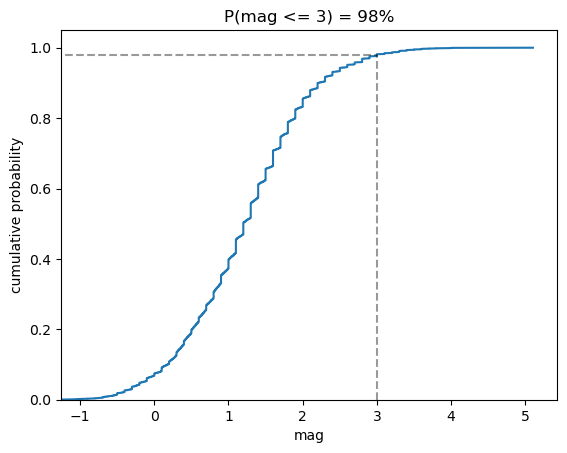

In [80]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
 [3, 3], [0, .98], 'k--',
 [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)
# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')
plt.show()

## Box plots


To make box plots with pandas, we pass kind='box' to the plot() method:

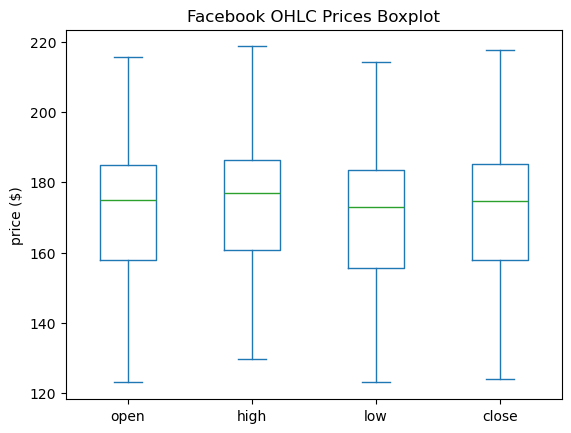

In [82]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)
plt.show()
# here we are able to create a box plots

This can also be combined with a groupby() :

C:\Users\kurt\AppData\Local\Temp\ipykernel_4316\2180763175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


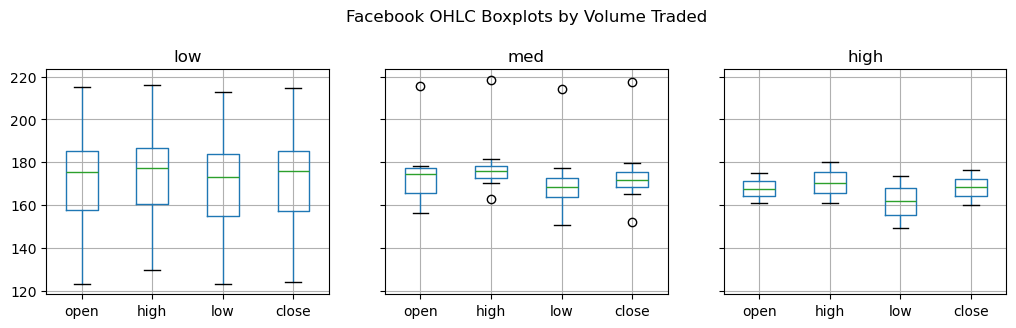

In [84]:
fb.assign(
 volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
 column=['open', 'high', 'low', 'close'],
 layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)
plt.show()
# here we are able to create a multiple box plots with different labels

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

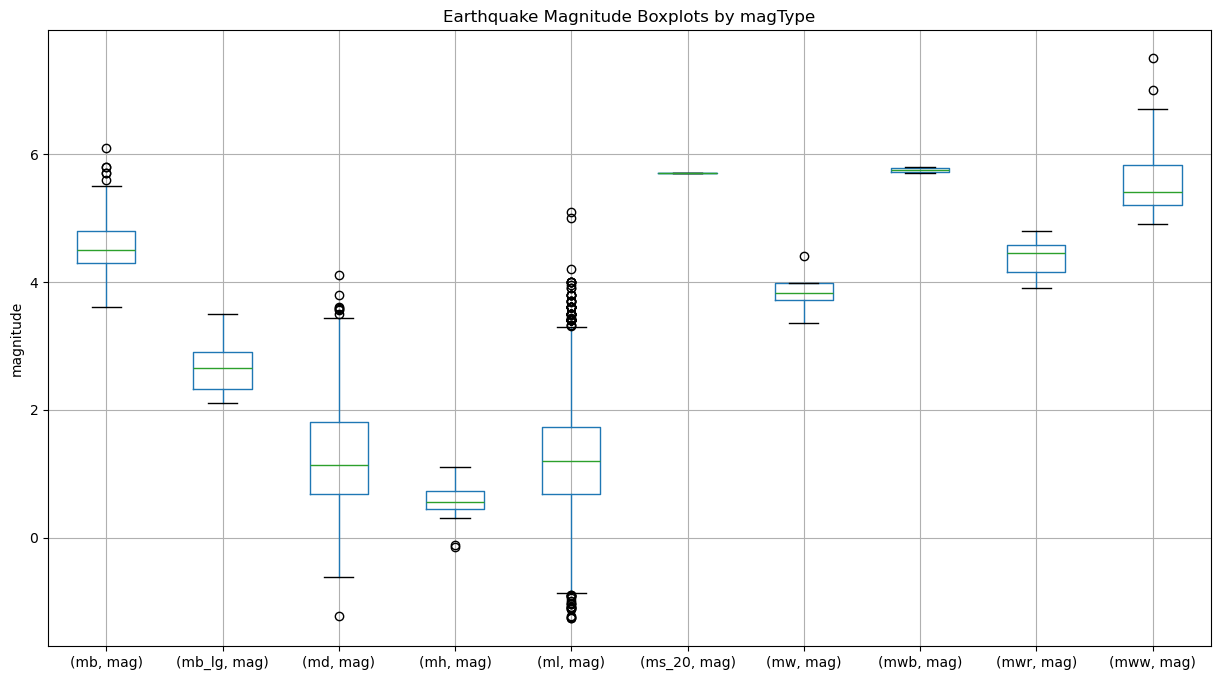

In [86]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)
plt.show()
# here we able to create a many box plots in every magtype

## Counts and frequencies

## Bar charts

With pandas, we have the option of using the kinf argument for using plot.<kind>. Let's use plot.bar() here to show the evolution of monthly volume traded in Facebook stock over time:

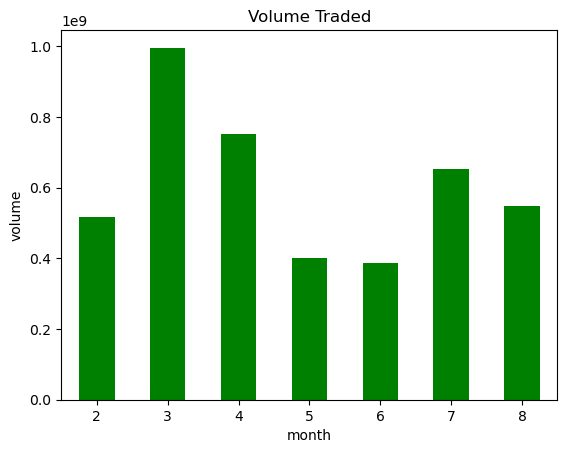

In [499]:
fb['2018-02':'2018-08'].assign(
 month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
 color='green', rot=0, title='Volume Traded'
 )
plt.ylabel('volume') # label the y-axis (discussed in chapter 6)
plt.show()
# th output is able to generate a bar grpah

We can also change the orientation of the bars. Passing kind='barh' gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for
earthquakes in our data:

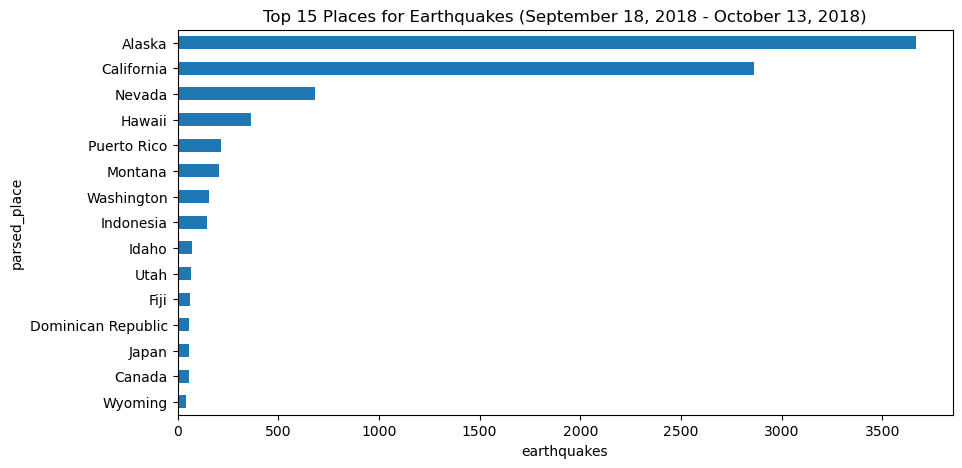

In [90]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
 kind='barh', figsize=(10, 5),
 title='Top 15 Places for Earthquakes '\
 '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)
plt.show()
# base on the output we are able to create a side bar graph that take the top 15 pplaces for the earthquake

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

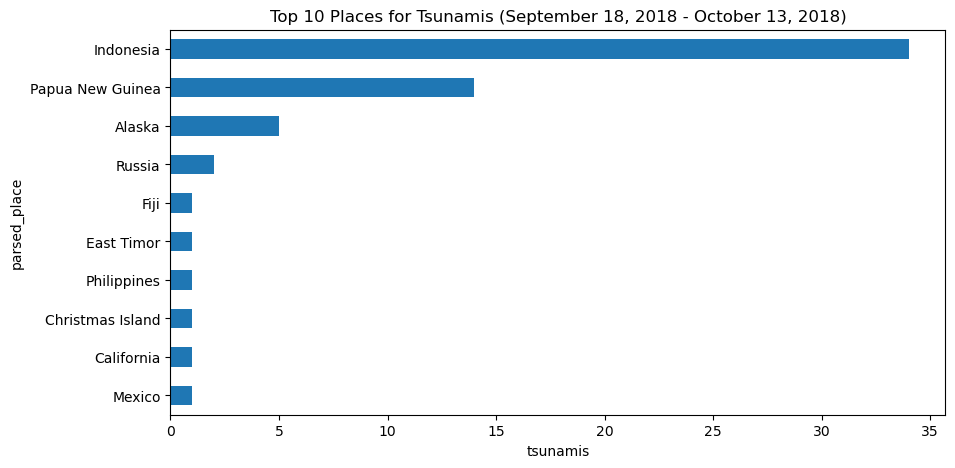

In [92]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
 kind='barh', figsize=(10, 5),
 title='Top 10 Places for Tsunamis '\
 '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)
plt.show()
# here we are able to create a horizontal bar graph that show sthe top places for tsunamis

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a
daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here:


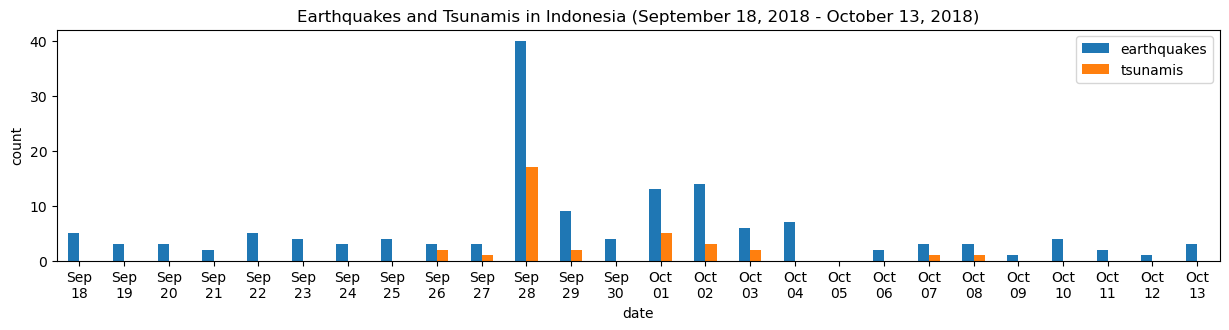

In [94]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms'),
 earthquake=1
).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(
 y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
 label=['earthquakes', 'tsunamis'],
 title='Earthquakes and Tsunamis in Indonesia '\
 '(September 18, 2018 - October 13, 2018)'
)
# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')
plt.show()


Using the kind arugment for vertical bars when the labels for each bar are shorter:

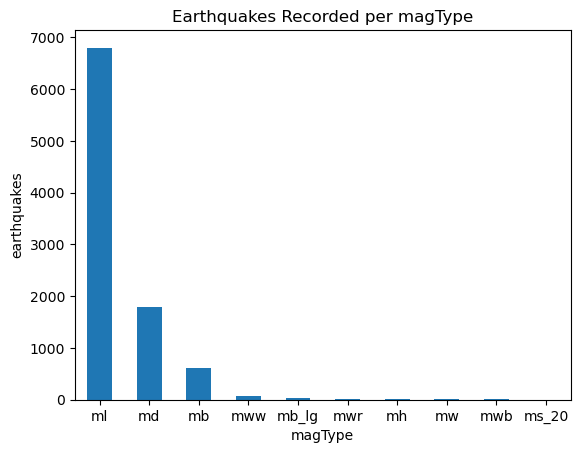

In [96]:

quakes.magType.value_counts().plot(
 kind='bar', title='Earthquakes Recorded per magType', rot=0
)
# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')
plt.show()

Top 4 places with earthquakes:

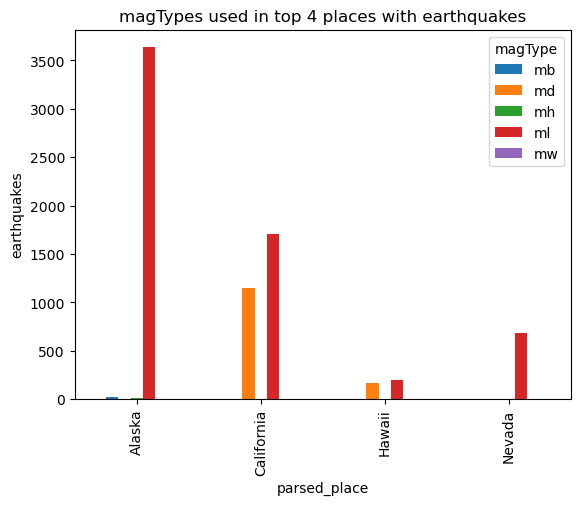

In [98]:
quakes[
 quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
 title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)
plt.show()

In [99]:
pivot = quakes.assign(
mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
stacked=True, rot=0,
title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

Text(0, 0.5, 'earthquakes')

## Stacked bar chart

pivot = quakes.assign(
 mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
 index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
 stacked=True, rot=0,
 title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

## Normalized stacked bars


Plot the percentages to be better able to see the different magTypes .

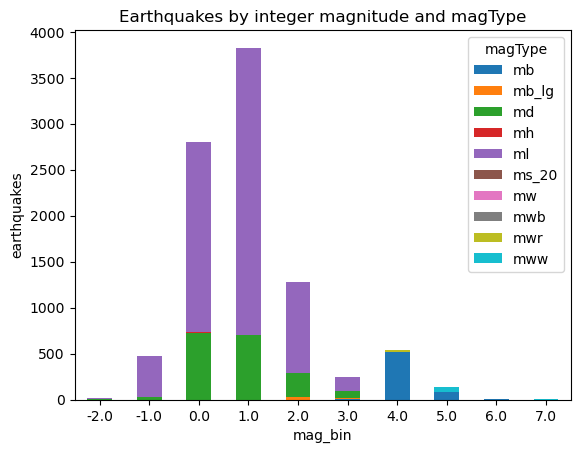

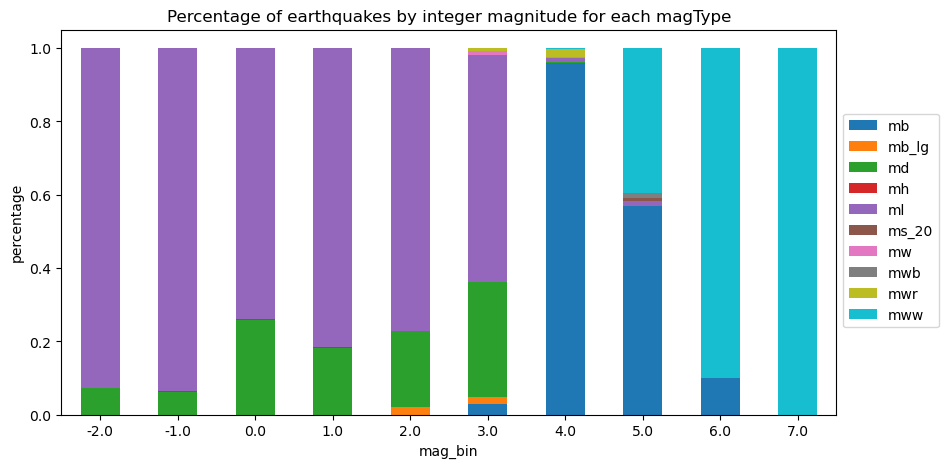

In [102]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
 stacked=True, rot=0, figsize=(10, 5),
 title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)
plt.show()

# 9.3 Pandas Plotting Subpackage

### pandas.plotting subpackage

Pandas provides some extra plotting functions for a few select plot types.

## About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018.

## Setup

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

## Scatter matrix

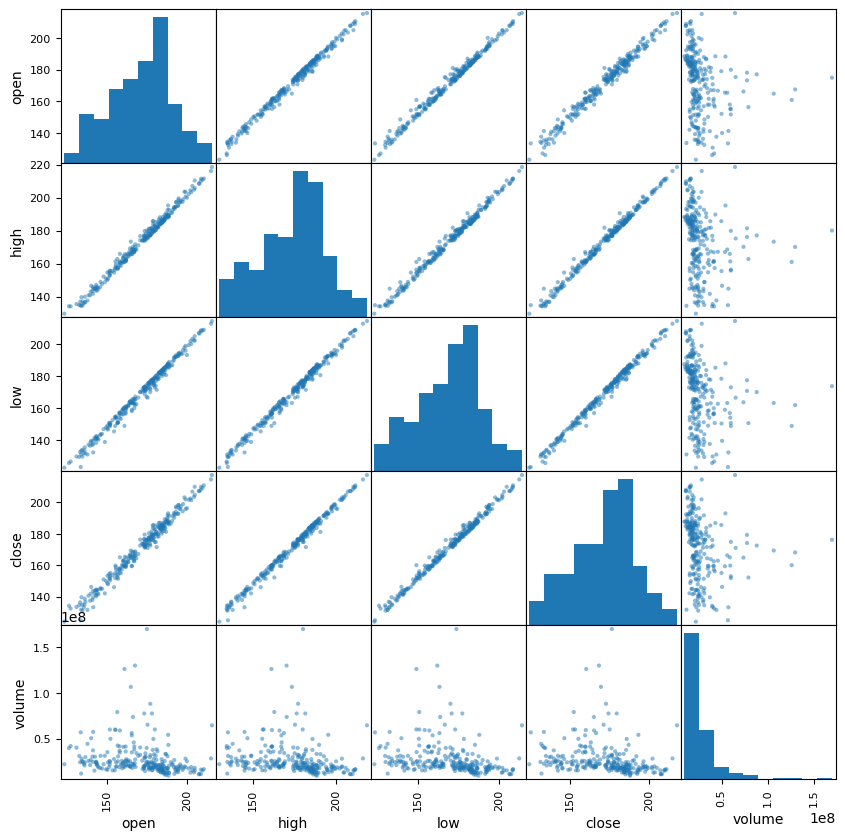

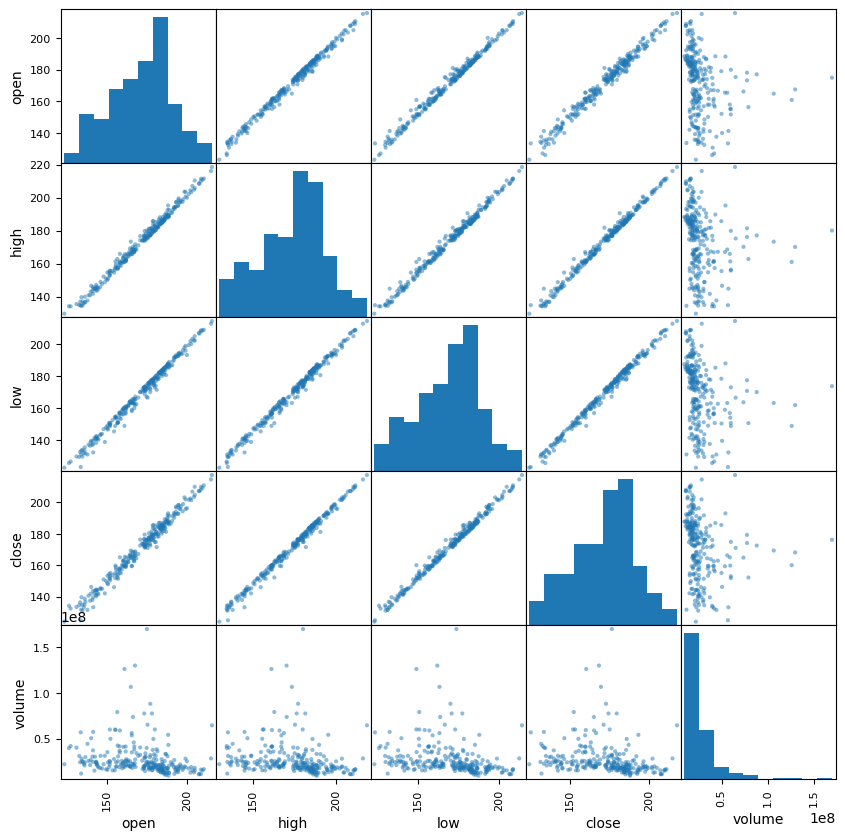

In [110]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))
plt.show()

# base on the output we are able to create a matrix plot
# that has a histogram plot in the diagonal section of the plots

Changing the diagonal from histrograms to KDE

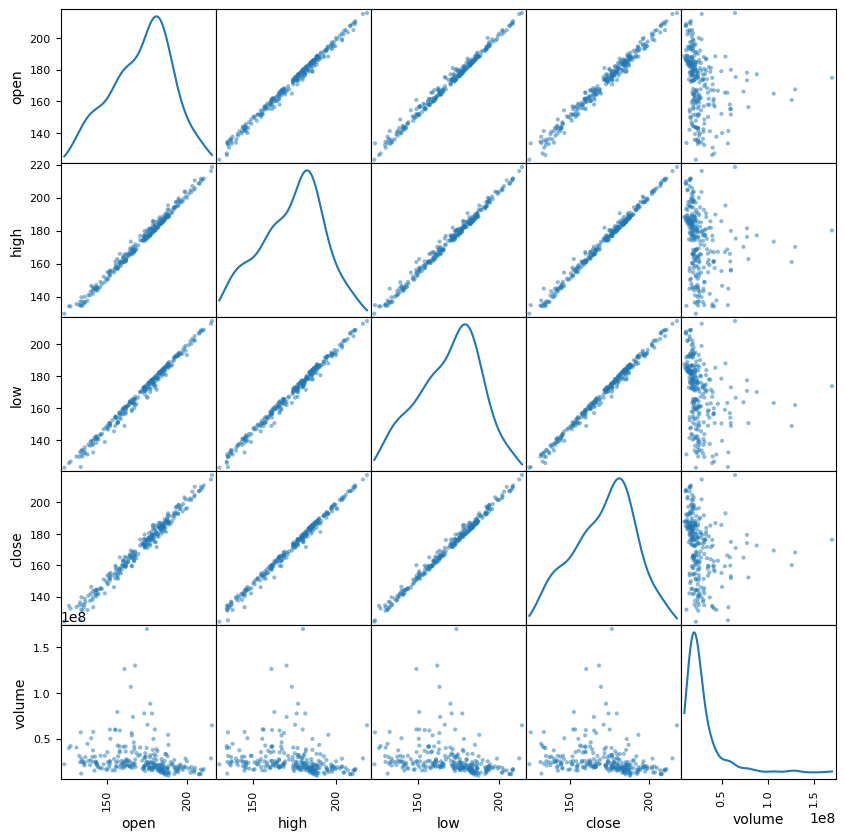

In [251]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()
# same thing here howeever the diagonal is change form histogram into kde graph

## Lag plot

Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

In [116]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):

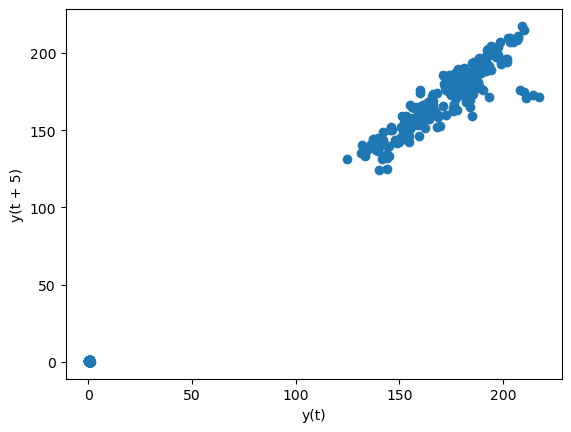

In [118]:
lag_plot(fb.close, lag=5)
plt.show()

## Autocorrelation plots


We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):




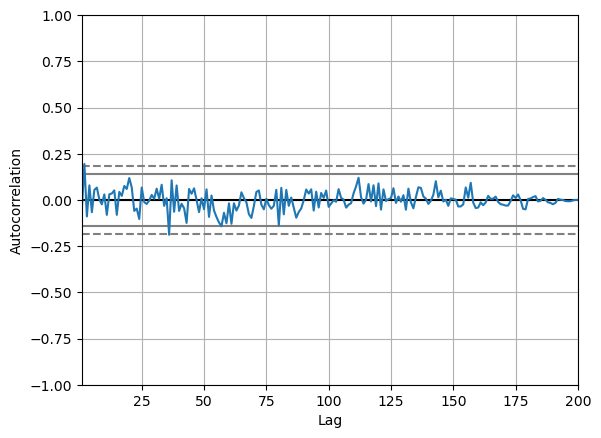

In [120]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

# here we are able tot create a autocorrelation plots

Stock data, on the other hand, does have significant autocorrelation:

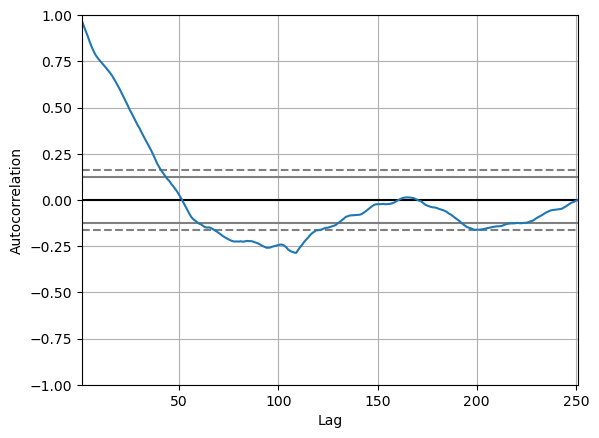

In [122]:
autocorrelation_plot(fb.close)
plt.show()

## Bootstrap plot

This plot helps us understand the uncertainty in our summary statistics:

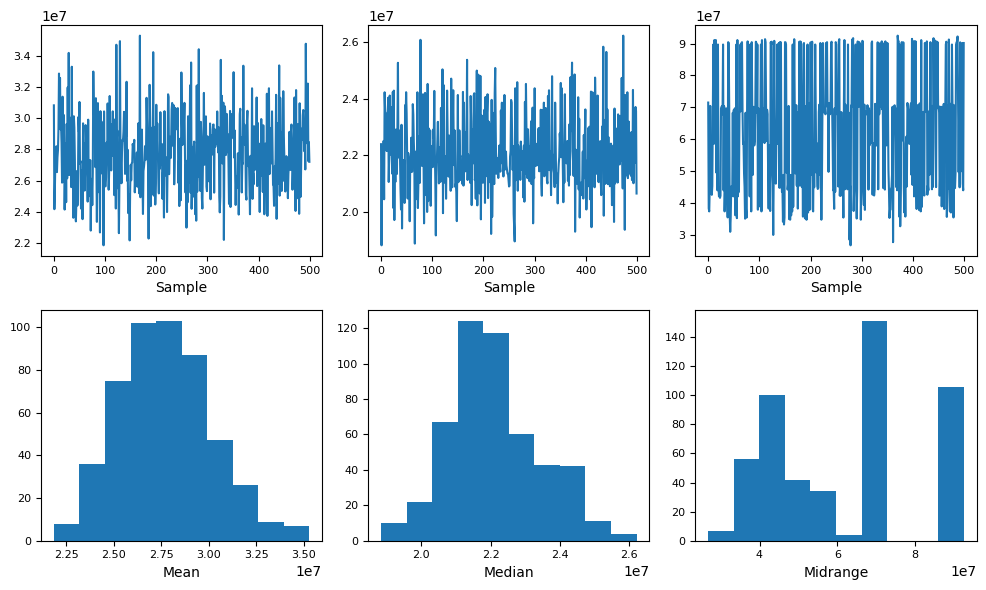

In [124]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()
# base on the output the the bootstraps shows the graph of summary statistics in our dataframe

## Data Analysis:

Provide comments on output from the procedures above.

# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

<font size= 7>EXTRACTION PHASE</font>

In [130]:
# for the supplementary activity we will extract the csv that we needed
import pandas as pd

# fb stock prices 2018

df1 = pd.read_csv('fb_stock_prices_2018.csv')

# earth quakes-1

df2 = pd.read_csv('earthquakes-1.csv')

In [132]:
df1.head()

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [134]:
df2.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<font size =7>TRANSFORMATION PHASE</font>

In [146]:
# in this phase we are going to clean our dataframe before we use it in the supplementary

#checking shapes
print(f'DATAFRAME1 : {df1.shape}')
print('==================================')
print(f'DATAFRAME2: {df2.shape}')

DATAFRAME1 : (251, 6)
DATAFRAME2: (9332, 6)


In [150]:
# checking if there are columns that has same name

print(f'DATAFRAME1 : {df1.columns.duplicated()}')
print('==================================')
print(f'DATAFRAME2: {df2.columns.duplicated()}')

DATAFRAME1 : [False False False False False False]
DATAFRAME2: [False False False False False False]


In [152]:
# checking if there are null values
print(f'DATAFRAME1 : {df1.isnull().sum()}')
print('==================================')
print(f'DATAFRAME2: {df2.isnull().sum()}')

DATAFRAME1 : date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64
DATAFRAME2: mag             1
magType         1
time            0
place           0
tsunami         0
parsed_place    0
dtype: int64


In [184]:
# Since there is a singel column that has missing values we are just going to drop it

df2[df2.isnull().any(axis=1)]

,mag,magType,time,place,tsunami,parsed_place
6404,NaN,NaN,1537906325240,"13km NW of Parkfield, CA",0,California


In [186]:
df2.dropna(inplace =True)

In [188]:
# now the rows that nan value are gone
df2[df2.isnull().any(axis=1)]
# lets move on to checking datatypes

,mag,magType,time,place,tsunami,parsed_place


In [192]:
#CHECKING DATATYPES

print(f'DATAFRAME1 : {df1.dtypes}')
# HERE THE DATE COLUMN IS NOT CONVERTED TO DATETIME DATATYPE LETS CHANGE IT
print('==================================')
print(f'DATAFRAME2: {df2.dtypes}')

DATAFRAME1 : date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object
DATAFRAME2: mag             float64
magType          object
time              int64
place            object
tsunami           int64
parsed_place     object
dtype: object


In [199]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes
#NOW IT IS CONVERTED TO DATETIME dtype

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [204]:
# since we are going to deal with rolling and resampling later we will set the date column as the index in dataframe 1

df1.set_index('date',inplace = True)

In [208]:
df1.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [212]:
# IG we can proceed now to the supplementary part
df2.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


<font size = 7>LOAD PHASE</font>

In [214]:
import matplotlib.pyplot as plt
import numpy as np

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method

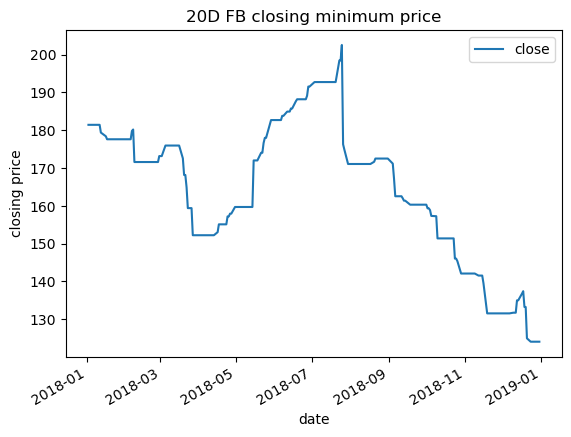

In [247]:
graph1 = df1.rolling('20D').agg({
    'close':'min'
})

# HERE WE ARE going to plot it using matplotlib
graph1.plot()
plt.title('20D FB closing minimum price')
plt.xlabel('date')
plt.ylabel('closing price')
plt.show()

2 . Create a histogram and KDE of the change from open to close in the price of Facebook stock.

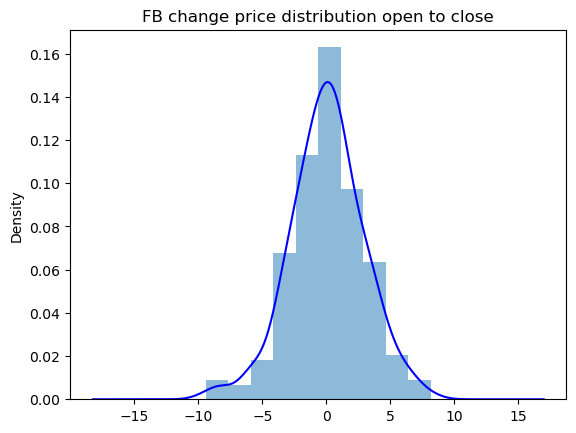

In [279]:
# final value - initial value
# here we apply 2 kinds of graphing the histogram
# and the kde


# BASE on the graph we can see the distribution of the change of prices of fb stock from opening to closing
df1 = df1.assign(
    change_of_price = df1['close'] - df1['open']
)
ax = graph2.plot(kind = 'hist',density=True,alpha = 0.5)
graph2.plot(ax = ax, kind = 'kde',color= 'blue')
plt.title('FB change price distribution open to close')
plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [281]:
df2.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


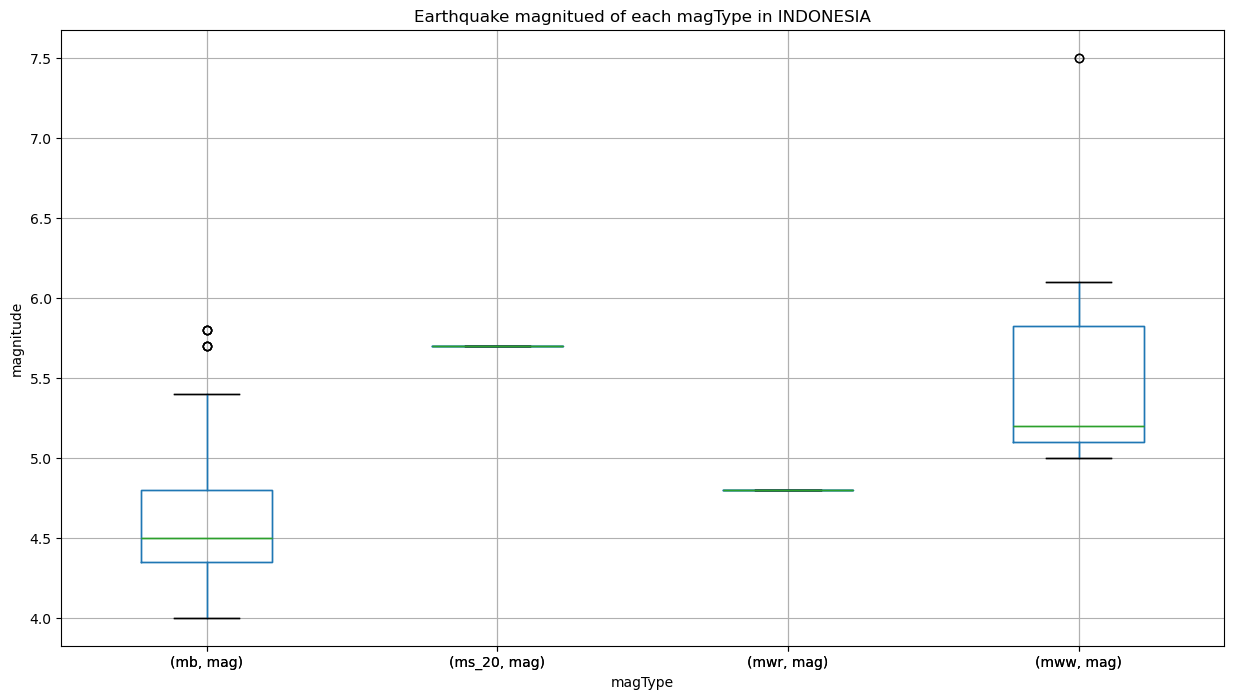

In [327]:
indo = df2.query('parsed_place == "Indonesia"')
indo[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(15, 8), subplots = False
)
plt.title('Earthquake magnitued of each magType in INDONESIA')
plt.xlabel('magType')
plt.ylabel('magnitude') 
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

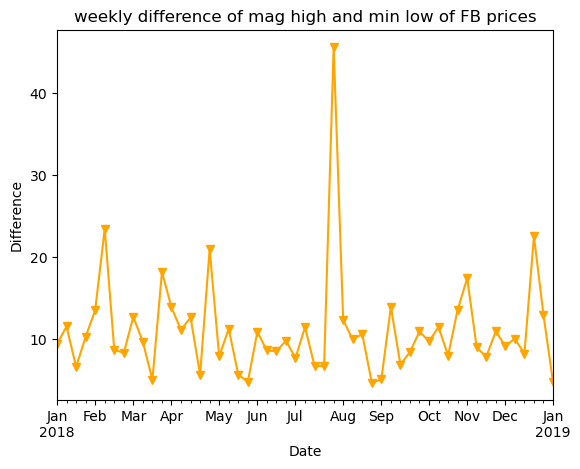

In [355]:
# to make a difference between the max high and min low prices of fb stocks we must resample our dataframe per week 
# aggregate the higha nd low into max and min
# then create a new column that will shows the difference betweent the two column
weekly = df1.resample('W').agg({
    'high':'max',
    'low':'min'
})

graph3 = weekly.assign(
    difference = weekly['high'] - weekly['low']
)

graph3['difference'].plot(marker = 'v',linestyle = '-', color = 'orange')
plt.title('weekly difference of mag high and min low of FB prices')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

In [391]:
# For the first requirement we will computer for after hours effect day's opening and priors day close
# we will use the shift 1 since we are reffering the previous day
df1['hour_effect'] = df1['open'] - df1['close'].shift(1)

# Next net effect in resampled monthly
monthly_effect = df1['hour_effect'].resample('ME').sum()

In [393]:
df1.head()

,open,high,low,close,volume,change_of_price,hour_effect
date,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08,0.35


In [395]:
monthly_effect

date
2018-01-31    -3.3500
2018-02-28     0.0200
2018-03-31   -19.3700
2018-04-30    19.6247
2018-05-31    -2.6488
2018-06-30    -3.6246
2018-07-31   -35.0750
2018-08-31     5.5992
2018-09-30   -14.0150
2018-10-31     3.0950
2018-11-30    -8.5100
2018-12-31    -2.5200
Freq: ME, Name: hour_effect, dtype: float64

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
    
- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

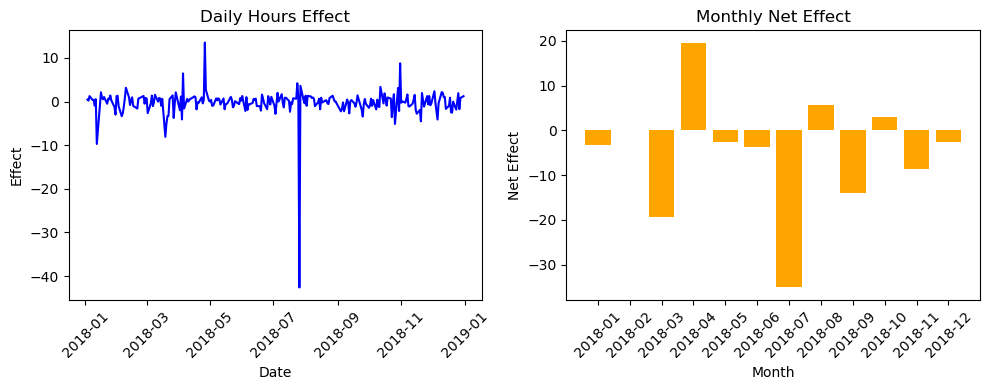

In [463]:
# NOW THAT WE HAVE ALL THE DATA THAT WE NEEDED WE CAN NOW PROCEED TO THE GRAPHING

# HERE I PREPARE subplot that will be use for the 2 dataset the we prepare

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# line graph hour_effect
axes[0].plot(df1.index, df1['hour_effect'], color='blue')
axes[0].set_title('Daily Hours Effect')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Effect')
axes[0].tick_params(axis = 'x' ,rotation = 45)


# bar graph of monthly_effect
axes[1].bar(monthly_effect.index.strftime('%Y-%m'), monthly_effect.values, color='orange')
axes[1].set_title('Monthly Net Effect')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

In [459]:
# inorder to do this I need to prepare the condition on what colors should appear if the value is below zero and above zero

colors = ['green' if x >= 0 else 'red' for x in monthly_effect.values]
colors

['red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red']

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [451]:
# here we change the x label from date format in three letter month abbreviation

month_label = monthly_effect.index.strftime('%b')
month_label

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='date')

<font size =5>FINAL OUTPUT</font>

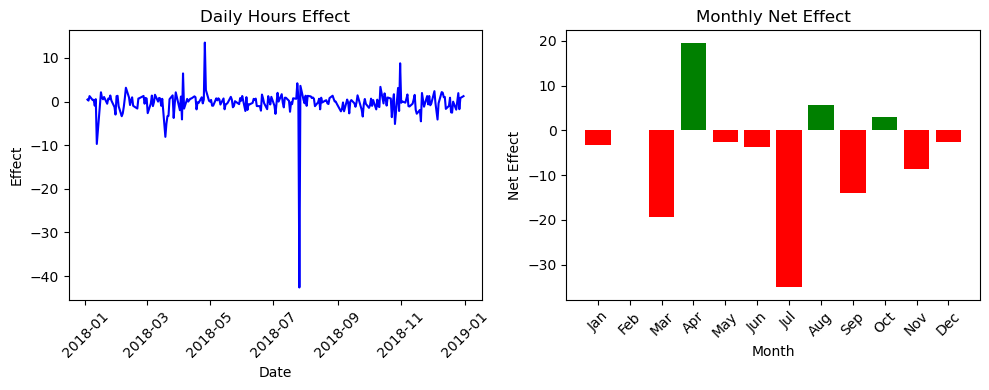

In [471]:
# Now that we have all the necessary things its time to apply it to the final output
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# line graph hour_effect
axes[0].plot(df1.index, df1['hour_effect'], color='blue')
axes[0].set_title('Daily Hours Effect')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Effect')
axes[0].tick_params(axis = 'x' ,rotation = 45)


# bar graph of monthly_effect
axes[1].bar(month_label, monthly_effect.values, color=colors)
axes[1].set_title('Monthly Net Effect')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Summary/Conclusion:

Provide a summary of your learnings and the conclusion for this activity.

- For this activity I was able to learn how to use the matplotlib library and apply it into the analysis of the dataframe. With the help of this library I was able to create visualization and create insights about the given dataframe. However, when I was doing the supplementary activity I was having difficult time coding the graph part wherein I was still looking in my notes in the proceedure part. On the other hand, I can say that Im getting good in aggregating the necessary data before utilizing it into the graph because I can make it without looking in my past notes.